## **Table of contents**  
1. Introduction  
    1.1 About Bellabeat  
    1.2 Business Task  
    1.3 Key stakeholders  
2. Prepare  
    2.1 Data type  
    2.2 Data licensure, privacy and accessibility  
    2.3 Data credibility  
    2.4 Data integrity  
3. Process data  
    3.1 Setting up environment  
        a) Loading packages  
        b) Loading files  
    3.2 Format time to R dttm  
    3.3 Cleaning  
4. Analyze  
    4.1 Grade activity data by intensity (MET)  
    4.2 Most active time of the day    
    4.3 Analyze sleep data    
    4.4 Observe correlation between sleep and activity  
    4.5 Relationship between step count and calorie  
    4.6 Filter the unique users to assess their BMI  
    4.7 Daily activity levels  
5. Data-driven recommendations    
    5.1 Limitations and further exploration  
    5.2 Recommendations  

# 1. **Introduction**

### 1.1 About Bellabeat
Bellabeat is a high-tech manufacturer of health-focused products for women. It is a successful small company, with enormous potential to become a larger player in the global smart device market.  

 ### 1.2 Business task: 
Analyzing smart device fitness data to help unlock new growth opportunities for the company.

 ### 1.3 Key stakeholders: 
Bellabeat executive team , i.e. Urška Srše(Bellabeat’s cofounder and Chief Creative Officer), Sando Mur (Mathematician and Bellabeat’s cofounder), and Bellabeat marketing analytics team.


# 2. **Prepare**

 ### 2.1 Data type:

External data to augment decision-making, meet customer needs, predict supply and demand

 ### 2.2 Data licensure, privacy and accessibility:

This is an  open data made available for public usage. Data is licensed under [CC0: Public Domain,](https://creativecommons.org/publicdomain/zero/1.0/) to copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. This dataset is made available through Mobius in Kaggle.

### 2.3 Data credibility:

This data been generated between 03.12.2016-05.12.2016, which is not a current data. Moreover, it is a relatively small dataset containing only 30 sample size with no demographic data, we couldn't know if the sample was subset of the population as a whole without any bias.

### 2.4 Data integrity:

Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Considering the small sample size and short time-period data (two months), we are taking an operational approach for analysis. The population size remains unknown, thus the margin of error cannot be calculated.

# 3. **Process** **data**

### 3.1 Setting up the environment 
 #### a) Loading pacakges:
- tidyverse
- dplyr
- janitor
- lubridate
- ggplot2


In [1]:
library(tidyverse)
library(dplyr)
library(janitor)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Note: all the packages were already installed in the system, thus I had to simply load them. To install package use function `install.packages()` and then load the packages with function `library()`


#### b) Loading files

Considering the objective of the task and careful inspection of the 17 datasets available, I have chosen the following dataset for further analysis:
- met_minute_data
- sleep_data
- daily_steps_data
- hourly_steps_data
- daily_activity_data
- weight_data

In [2]:
met_minute_raw_data <- read_csv(
    '../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv', 
    show_col_types= FALSE)
sleep_raw_data <- read_csv(
    '../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv', 
    show_col_types= FALSE)
daily_steps_raw_data <- read_csv(
    '../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv',
    show_col_types= FALSE)
hourly_steps_raw_data <- read_csv(
    '../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv',
    show_col_types= FALSE)
daily_activity_raw_data <- read_csv(
    '../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv',
    show_col_types= FALSE)
weight_raw_data <- read_csv(
    '../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv', 
    show_col_types= FALSE)

> To preview dataframe use function 'head()'

 ### 3.1 Format time to R dttm
 
 Date and time inputs are in class 'char' by default, in order to manipulate data for analysis, we need to read date and time in date-time(dttm) format.

First, we are reading the SleepDay(from the sleep_data) and ActivityDay(from the daily_step_data) columns in date format(mm-dd-yy)

In [3]:
sleep_raw_data$Day <- as.Date(sleep_raw_data$SleepDay, 
                              tryFormats = c("%m/%d/%Y"))

daily_steps_raw_data$Day <- as.Date(daily_steps_raw_data$ActivityDay, 
                                    tryFormats = c("%m/%d/%Y"))

Note: as.Date() read date in date format, while it also ignores any character other than date after converting in date class

Second, we are reading ActivityHour from 'hourlySteps_merged.csv' data; here we need to read the time, hence using POSIX class.

In [4]:
hourly_steps_raw_data$Day <- as.POSIXct(hourly_steps_raw_data$ActivityHour,
                                        format= "%m/%d/%Y %I:%M:%S %p")


##### Note: Using POSIX class to read date and time in dttm format, as.Date() ignores all other characters in the string after converting the characters it recognizes as part of a date into a date class.
Here I have used 'POSIXct' class to read in date-time format instead of 'POSIXlt', as transformation for date-time doesn't work with POSIXlt while working with plots.

reference to read the column in 'date-time'(dttm) format: https://www.stat.berkeley.edu/~s133/dates.html and https://www.neonscience.org/resources/learning-hub/tutorials/dc-convert-date-time-posix-r



## 3.2 **Cleaning**

### Pull out undesired columns, rename column name
from the data frame hourly_steps I'm selecting column Id,StepTotal and ActivityHour; rename column ActivityHour as 'Day' for convenient merging with other dataset during further analysis

In [5]:
hourly_steps_new_data <- hourly_steps_raw_data %>% select(Id,StepTotal,Day)%>% 
                         rename(ActivityHour = Day)

### Remove empty rows

from dataset met_minute_data remove empty rows if any

In [6]:
x <- subset(met_minute_raw_data, !complete.cases(met_minute_raw_data))

no empty rows or cells found
Note: I have similarly checked with every dataset and no empty rows were found.

### remove rows containing no activities

The input data set (daily_activity) may contain data points with no activity (step count = 0). Use the filter function to collect only the rows with a valid step count (non zero step count).

In [7]:
daily_activity_new_data <- daily_activity_raw_data %>% filter(TotalSteps > 0)

### remove duplicates from met_minute dataset

In [8]:
met_minute_df <- distinct(met_minute_raw_data, Id, ActivityMinute, .keep_all= TRUE)

# 4. **Analyze**

### 4.1 Grade activity data by intensity (MET)

MET stands for the metabolic equivalent of task. One MET is the amount of energy used while sitting quietly. Physical activities may be rated using METs to indicate their intensity.

METs can be translated into various categories according to the intensity of activities performed. Below is one such scale I used as reference in order to interpret the MET minutes into categories.

|                    |                                                                                                                                          |
|--------------------|----------------------------------------------------------------------------------------------------------------|
| Sedentary          | Uses 1.5 or fewer METs. Examples are sitting, reclining, or lying down                                                                   |
| Light intensity    | Uses from 1.6-3.0 METs. Examples are walking at a leisurely pace or standing in line at the store                                        |
| Moderate intensity | Uses from 3.0-6.0 METs. Examples are walking briskly(https://www.hsph.harvard.edu/nutritionsource/walking/), vacuuming, or raking leaves |
| Vigorous intensity | Uses from 6.0+ METs. Examples are walking very quickly, running, taking an aerobics class, or shoveling snow                             |

Source: https://www.hsph.harvard.edu/nutritionsource/staying-active

#### Calculate the time spent for each intensity levels

To calculate the time, filter the MET values using the above MET scale the result is the data points of the specific intensity. Each point is for one minute. The total minutes for this activity level can be calculated by counting the number of rows in the dataframe (using the `nrow` function).

In [9]:
sedentary_minutes <- nrow(met_minute_df %>% filter(METs >= 0 & METs <= 1.5))
light_intensity_minutes <- nrow(met_minute_df %>% filter(METs >= 1.6 & METs <= 3))
moderate_intensity_minutes <- nrow(met_minute_df %>% filter(METs > 3 & METs <= 6))
high_intensity_minutes <- nrow(met_minute_df %>% filter(METs > 6))

# Create a dataframe with the intensity minutes
activity_intensity <- data.frame(
    type=c('sedentary_minutes','light_intensity_minutes','moderate_intensity_minutes',
    'high_intensity_minutes'),
    time_in_minutes=c(sedentary_minutes, light_intensity_minutes,moderate_intensity_minutes, high_intensity_minutes))

In [10]:
View(activity_intensity)

type,time_in_minutes
<chr>,<int>
sedentary_minutes,7
light_intensity_minutes,0
moderate_intensity_minutes,1
high_intensity_minutes,1325572


The result showcase users use the smart device while performing high intensity activities, while the other categories are negligible.

### 4.2 Most active time of the day

In order to discover the hourly steps taken by the users, I have obtained the hourly steps data, and summarized the total steps by users with relation to time.
(Note: extract time from ActivityHours. Source for reference: https://www.geeksforgeeks.org/how-to-extract-time-from-datetime-in-r)


Multiply the step count by the number of users to get the combined activity level of all users.
Find the maximum step count by using the`max()` function to limit the height of the graph while plotting it.

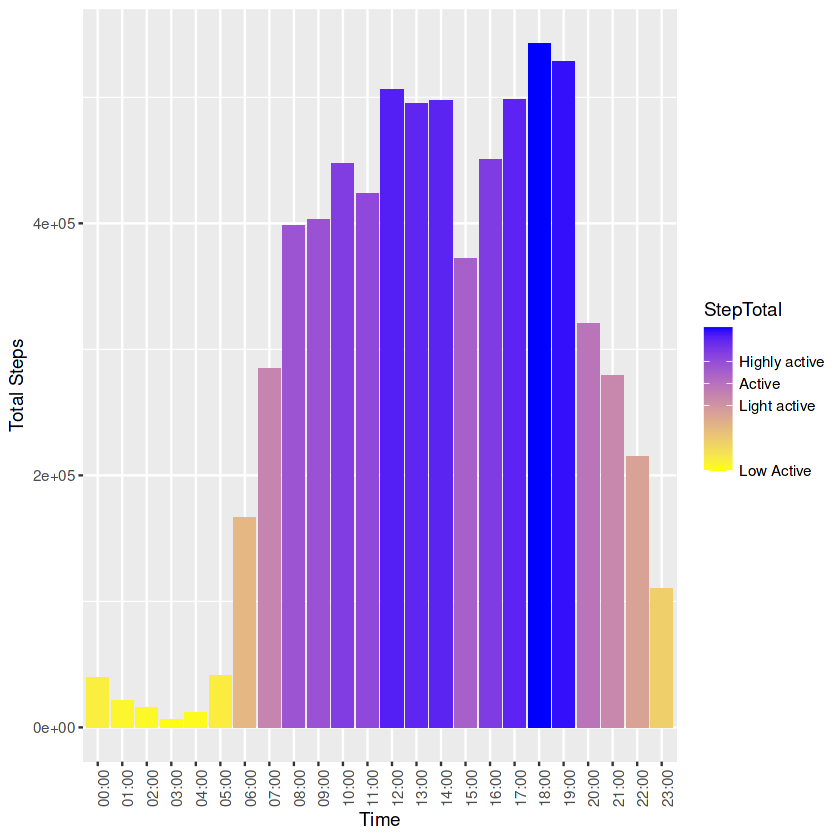

In [11]:
number_of_users <- length(unique(hourly_steps_new_data $ Id))

steps_at_time_of_day <- hourly_steps_new_data %>% 
                        group_by(ActivityHour=format(as.POSIXct(ActivityHour),
                        format="%H:%M")) %>% 
                        summarize(StepTotal = sum(StepTotal))
max_steps <- max(steps_at_time_of_day$StepTotal)

ggplot(steps_at_time_of_day, aes(y=StepTotal, x=ActivityHour,fill=StepTotal)) + 
    geom_bar(stat='identity', position='dodge') +
    labs(x='Time', y='Total Steps') +
    scale_fill_gradientn(colours=c('yellow', 'blue'), na.value = "transparent",
                         breaks=c(0, 7499 * number_of_users, 10000 * number_of_users, 
                                  12500 * number_of_users),
                         labels=c("Low Active", "Light active","Active","Highly active"), 
                         limits=c(0,max_steps)) + 
    theme(axis.text.x=element_text(angle=90))

The following pedometer indices have been developed to provide a guideline on steps and activity levels:
* Sedentary is less than 5,000 steps per day 
* Low active is 5,000 to 7,499 steps per day
* Somewhat active is 7,500 to 9,999 steps per day
* Active is more than 10,000 steps per day
* Highly active is more than 12,500  
Studies using the 10,000 steps per day goal have shown weight loss, improved glucose tolerance, and reduced blood pressure from increased physical activity toward achieving this goal.
source: https://www.10000steps.org.au/articles/healthy-lifestyles/counting-steps/


As we can see from the graph above, the smart device users are active between 8am to 7pm; likewise, highly active between 12pm to 2pm and 5pm to 7pm. These are the essential hour where people are commuting to and fro work, and the 12pm-2pm hours are the lunch hours where most people find time for leisure from their busy schedule.

### 4.3 Analyse sleep data

The sleep data 'sleepDay_merged.csv' has been imported and stored as 'sleep_raw_data'.
We will consider the two columns `TotalMinutesAsleep` and `TotalTimeInBed` to analyse the correlation

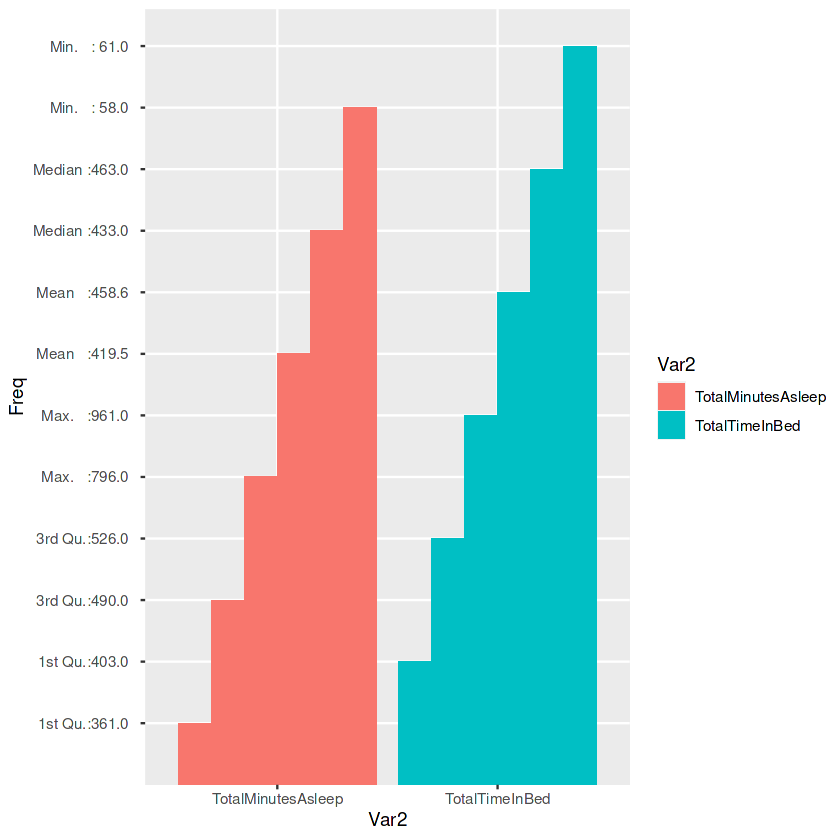

In [12]:
sleep_summary <- data.frame(sleep_raw_data %>% select('TotalMinutesAsleep','TotalTimeInBed') %>% summary())

ggplot(sleep_summary, aes(x= Var2, y=Freq, fill= Var2)) +
       geom_bar(stat= 'identity', position= 'dodge')

As we can see people spend more time in bed vs they are asleep. For some people it might be a challenge getting to sleep, while there can be numerous reasons for it, one might be using phone or watching tv on bed (more screen time in bed reduces your sleep and sleep quality).
Sample size for this data is 24, which is very small size, a large dataset with more observations is needed to make an accurate analysis.

### 4.4 Observe correlation between sleep and activity

Let's consider the sleep data and daily steps data, merge both the datasets with their Id and Day to create sleep vs activity visualization.

`geom_smooth()` using formula 'y ~ x'



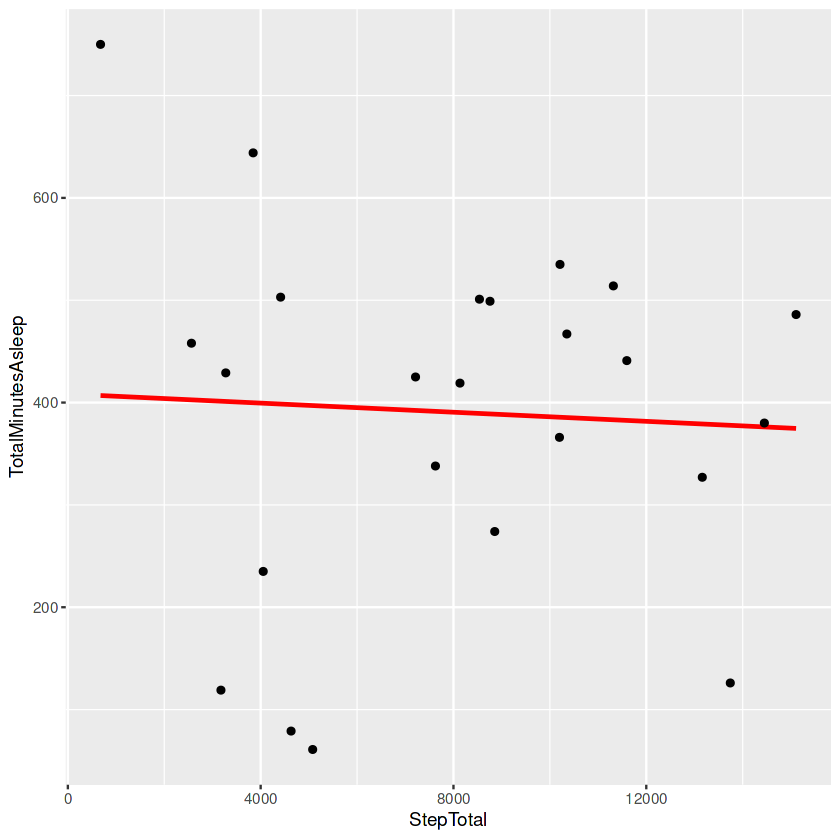

In [13]:
daily_sleep_step_data <- merge(sleep_raw_data, daily_steps_raw_data, by=c("Id", "Day"), all=TRUE) %>% 
                         select(Id, Day, StepTotal, TotalMinutesAsleep) %>% 
                         drop_na() %>%
                         distinct(Id, .keep_all=TRUE)
ggplot(daily_sleep_step_data, aes(y=TotalMinutesAsleep, x=StepTotal)) + 
       geom_smooth(method= "lm", se= FALSE, color="red") + geom_point()

Note: 'lm' adds linear trend line, "se=FALSE" argument hides the shaded confidence region around the trend line.

ref. link https://www.statology.org/ggplot-trendline/

As we can see, no significant correlation is noticed between daily steps and sleep. However, there isn't enough data to prove this conclusion.

### 4.5 Relationship between step count and calorie

To calculate and interpret relationship between the two variables 'TotalSteps' and 'Calories', we are considering the dataset daily activity, group them by the  key variable 'Id' and summarize by the adding the variables. A scatterplot could be displayed for analyzing the correlation between the two variables.

`geom_smooth()` using formula 'y ~ x'



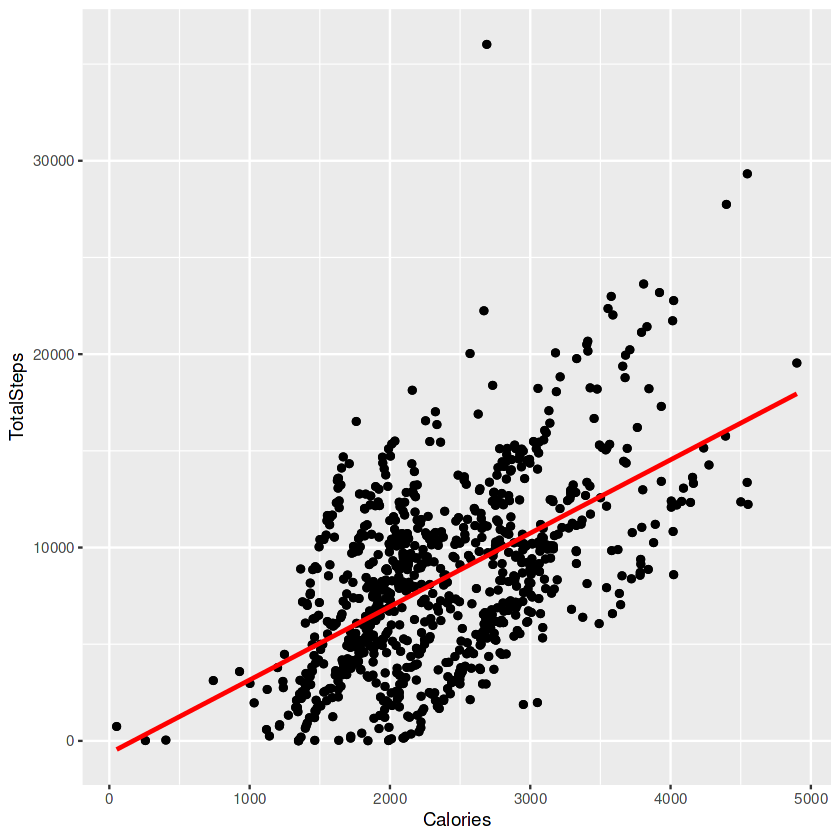

In [14]:
sum_daily_activity_df <- daily_activity_new_data %>%
                        group_by(Id) %>%
                        summarize(sum_total_steps=sum(TotalSteps),
                                  sum_calories=sum(Calories))
ggplot(daily_activity_new_data, aes(x=Calories, y=TotalSteps)) +
    geom_point() + geom_jitter() + geom_smooth(method="lm", se=FALSE, color="red")

 The correlation graph above show the data points gradually group together to form a linear line. It is evident, the two variables 'step count' and'calories' have a moderate correlation with each other. As the step count increase, the amount of calorie burnt too increase. However, with more data we could achieve more reliable conclusion. Nevertheless, it is essential to note that a correlation can never always mean causation.
 
 Source for interpreting a correlation graph: https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf

### 4.6 Filter the unique users to assess their BMI

Import the BMI data, sample size is 8.

In [15]:
weight_data <- weight_raw_data %>% distinct(Id,.keep_all=TRUE)

Since the sample size is very small, a conclusive recommendation could not be achieved with this analysis. It is important to gather recommemdation only from data that are random, accurate and unbiased.

### 4.7 Daily activity levels

Calculate the percentage of activity intensity (sedentery to very active) over the total distance the users were active with the smart device.

activity,percentage
<chr>,<dbl>
very_active,27.37272110
moderately_active,10.33831233
light_active,60.85610976
sedentery,0.02926175


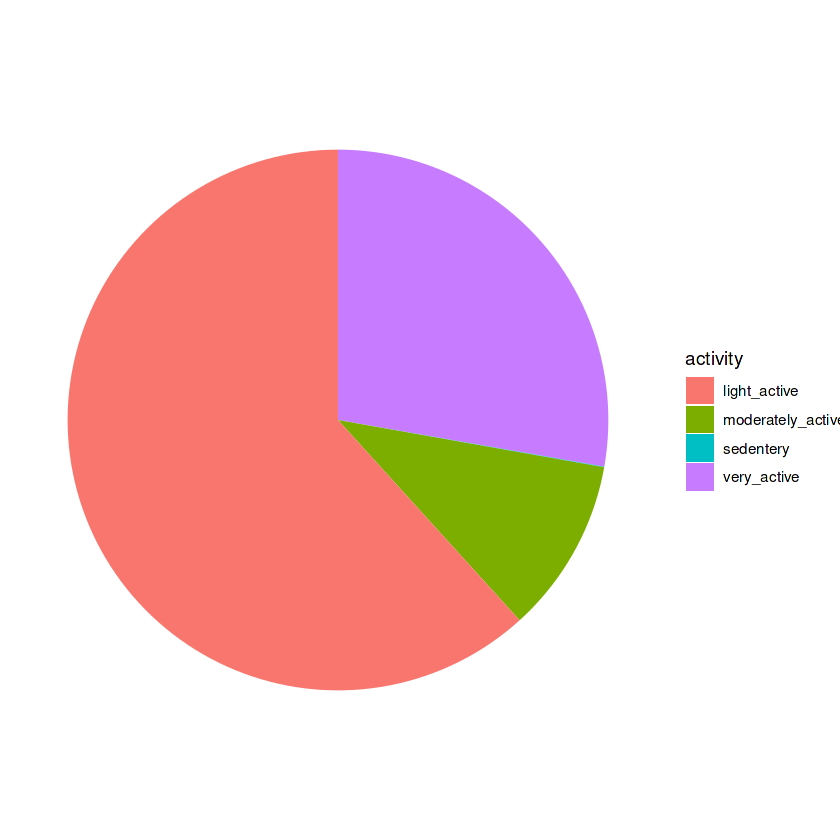

In [16]:
very_active <- sum(daily_activity_raw_data$VeryActiveDistance) / 
                sum(daily_activity_raw_data$TotalDistance) * 100
moderately_active <- sum(daily_activity_raw_data$ModeratelyActiveDistance) / 
                sum(daily_activity_raw_data$TotalDistance) * 100
light_active <- sum(daily_activity_raw_data$LightActiveDistance) /
                sum(daily_activity_raw_data$TotalDistance) * 100
sedentery <- sum(daily_activity_raw_data$SedentaryActiveDistance) / 
                sum(daily_activity_raw_data$TotalDistance) * 100

activity_levels <- data.frame(
                    activity= c('very_active', 'moderately_active', 'light_active', 'sedentery'),
                    percentage=c(very_active, moderately_active, light_active, sedentery)
                   )

ggplot(activity_levels, aes(x="", y=percentage, fill=activity)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
    theme_void()

View(activity_levels)

Major group of people using the smart device are lightly active over their activity duration than other users who are very and moderately active. Only negligble number of people were found to be sedentary while using the smart device.

# 5. **Data-driven recommendations**

### 5.1 Limitations and further explorations

- As Bellabeat is a high-tech manufacturer of health focused products for women, due to the lack of demographic details in the data provided it is unable to lay out womencentric recommendations from the data.
- Likewise, due to the small sample size and limited time of study a conclusive analysis wasn't quite possible.
- Dwelling into the Bellabeat-user data could grant more powerful insights useful for the growth of the company.

### 5.2 Recommendations

1. Sleep is essential for the over all well-being, thus, introducting features in the app which could send notifications in an interval of 30 mins. as a **reminder for sleep**. User could be allowed to set a alarm for sleep (for atleast 7-8 hours for aults),the customer could switch on the timer as soon as he/she gets into the bed; thus, not wasting time on bed and tracking the duration of sleep.

2. Introducing various activity recommendations according to the activity level. Customers can get a **feedback about the intensity** of their activity by calculating METs (Metabolic Equivalent: MET stands for the metabolic equivalent of task. One MET is the amount of energy used while sitting quietly. Physical activities may be rated using METs to indicate their intensity). The more the intensity, the better the heart health. 

3. 10,000 steps per day goal: As most customers are learnt to be working people looking at the active hours i.e.between 8am to 7pm and most active during their lunch and after work hours, a notification could be sent targetting those hours to encourage activity and display the calorie burnt, also letting them manually log their weight. Adding additional features such as a **weekly feedback in the form of attractive visualizations, rewards for achieving target in the form of a badge could attract more attention.**

4. Creating a healthy **competitive environment** among the Bellabeat users could be more interesting. Letting **people connect through the apps, and knowing one anothers achievement** could be possibly exciting, insipring and motivate to keep going and do better. It would also let make new friends sharing common interest.

5. **Period tracker** is also good for tracking the monthly cycle and ruling out any abnormalities or potential health crisis.

- Overall, a product with long lasting battery and fast charging to be highly reliable
- Aesthetically pleasing so that it could be worn with all type of outfits
- Products should be available with options varying in size, colors and shapes for personalization
- Water-proof products so that it could be worn almost all the time, such as even during swimming activities.